In [2]:
import pandas as pd
import os
import numpy as np

In [5]:
test = pd.read_csv("../dataset/clientTrajectory_JailUpdate.csv")
test.columns

Index(['ProfileID', 'age', 'num_previous_recidivisms', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'gender_Male',
       'registeredSexOffender_TRUE', 'violentOffender_TRUE',
       'gangMember_x_TRUE', 'homeless_TRUE', 'DNACollected_TRUE',
       'employmentStatus_Full_Time', 'employmentStatus_Part_Time',
       'employmentStatus_Unemployed',
       'HighestEducationLevel_High_School_Diploma',
       'HighestEducationLevel_No_HS_Diploma',
       'HighestEducationLevel_Some_College', 'licenseStatus_Not_Suspended',
       'licenseStatus_Suspended', 'ArrivalTime', 'WorkReleaseArrival',
       'WorkReleaseDeparture', 'MonitoringArrival', 'MonitoringDeparture',
       'HomeArrival', 'HomeDeparture', 'JailArrival', 'JailDeparture',
       'Recidivism'],
      dtype='object')

In [6]:
test.drop(['WorkReleaseArrival', 'WorkReleaseDeparture','MonitoringArrival',
                    'MonitoringDeparture','HomeArrival', 'HomeDeparture', 'ArrivalTime',
                    'JailDeparture','JailArrival', 'ProfileID','DNACollected_TRUE'], axis = 1, inplace = True)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
y_b4 = test['Recidivism']
X_b4 = test.drop(['Recidivism'], axis=1)
X_trainb4, X_testb4, y_trainb4, y_testb4 = train_test_split( X_b4, y_b4, train_size = 0.7, random_state = 50)
#rf = RandomForestClassifier(max_depth=10, min_samples_split=30, n_estimators=1500, bootstrap=False, criterion = 'gini',
#                            min_samples_leaf=6, max_features='sqrt', random_state = 50)
rf = RandomForestClassifier(max_depth= 7, max_features = 'sqrt', min_samples_leaf = 5, 
 min_samples_split = 5, n_estimators = 100, random_state= 50)
rf.fit(X_trainb4, y_trainb4)

RandomForestClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=5,
                       random_state=50)

In [8]:
import shap

explainer_b4 = shap.TreeExplainer(rf)
shap_values_b4 = explainer_b4(X_trainb4)  

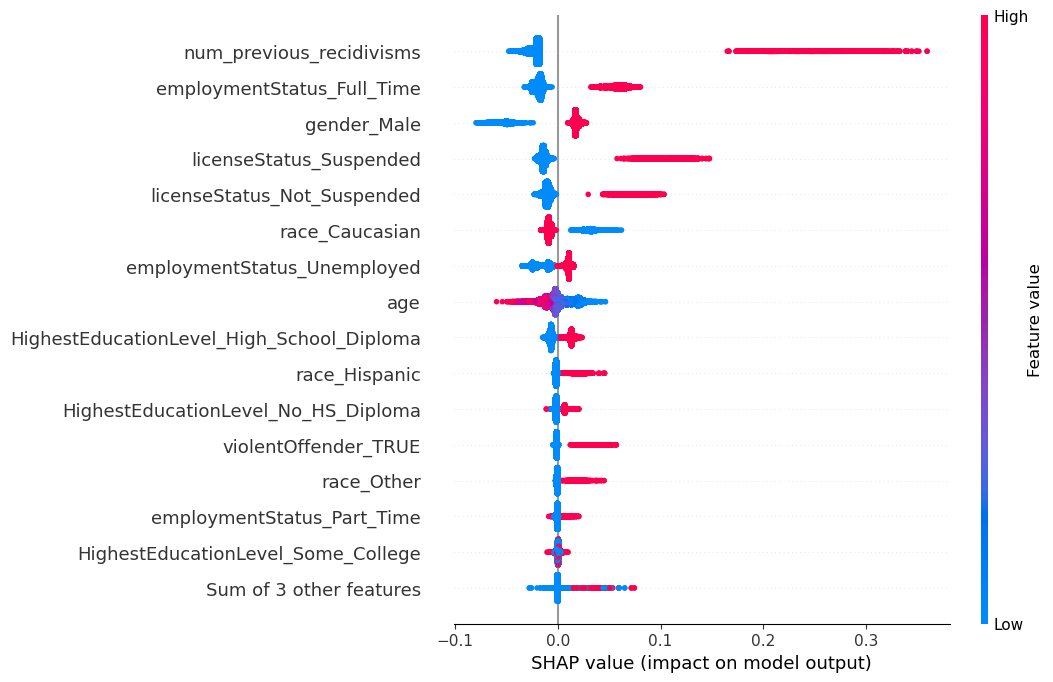

In [9]:
shap.plots.beeswarm(shap_values_b4[:,:,1], max_display = 16)

## ----------------------------------

In [3]:
my_csv = pd.read_csv("../dataset/clientTrajectory_JailUpdate.csv") 
my_csv.drop(['WorkReleaseArrival', 'WorkReleaseDeparture','MonitoringArrival',
                    'MonitoringDeparture','HomeArrival', 'HomeDeparture', 'ArrivalTime',
                    'JailDeparture','JailArrival', 'ProfileID','DNACollected_TRUE'], axis = 1, inplace = True)

In [85]:
my_csv2 = pd.read_csv("../dataset/clientTrajectory_JailUpdate.csv")
unknown_employment_index = my_csv2[ (my_csv2['employmentStatus_Full_Time'] == 0) & (my_csv2['employmentStatus_Part_Time'] == 0) & (my_csv2['employmentStatus_Unemployed'] == 0)].index
unknown_employment_age = my_csv2[ (my_csv2['employmentStatus_Part_Time'] == 0) & (my_csv2['employmentStatus_Unemployed'] == 0) & (my_csv2['employmentStatus_Full_Time'] == 0) ]['age']
unemployment_index = my_csv2[ my_csv2['employmentStatus_Unemployed'] == 1].index
unknown_employment_index

type1_index = list(unemployment_index) + list(unknown_employment_index)
type2_index = list(my_csv2[ my_csv2['employmentStatus_Full_Time'] == 1].index) + list(my_csv2[ my_csv2['employmentStatus_Part_Time'] == 1].index)

In [86]:
len(type1_index)

34032

In [87]:
len(type2_index)

16927

## Naive Random Forest model

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [5]:
y_raw = my_csv['Recidivism']
X_raw = my_csv.drop(['Recidivism'], axis=1)

In [40]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split( X_raw, y_raw, train_size = 0.7, random_state = 50)

In [49]:
rf_raw = RandomForestClassifier(max_depth= 7, max_features = 'sqrt', min_samples_leaf = 5, 
 min_samples_split = 5, n_estimators = 100, random_state= 50) 
rf_raw.fit(Xr_train, yr_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=5,
                       random_state=50)

In [50]:
sorted(rf_raw.feature_importances_)

[0.0032349352671750082,
 0.003459907591649264,
 0.00428310276947891,
 0.005334020347060039,
 0.005450367467449425,
 0.005684499735520467,
 0.006702193026018097,
 0.010771805915173736,
 0.01756061122494947,
 0.018898422515257605,
 0.028063026344898444,
 0.03224733513960904,
 0.054847635334738964,
 0.07685518394896994,
 0.08516303140397705,
 0.12394647536734638,
 0.14305872522807953,
 0.3744387213726486]

In [ ]:
rf_raw.feature_importances_ 
# .order of feature importance:
# only with demographics & tuned RF: num_prev, lincenseStatus_Suspended, employmentStatus_Full_Time, licenseStatus_Not_Suspended.
# only with demographics & default RF: age, num_prev, licenseStatus_Suspended, employmentStatus_Full_Time, gender_Male.
# with time record & delete nulls & default RF: num_prev, jail departure, home departure, jail arrival, age, monitoring departure.

array([0.05484764, 0.37443872, 0.03224734, 0.01077181, 0.00533402,
       0.07685518, 0.00345991, 0.01756061, 0.0042831 , 0.00323494,
       0.12394648, 0.0056845 , 0.02806303, 0.01889842, 0.00670219,
       0.00545037, 0.08516303, 0.14305873])

In [48]:
rf_raw.feature_names_in_

array(['age', 'num_previous_recidivisms', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'gender_Male',
       'registeredSexOffender_TRUE', 'violentOffender_TRUE',
       'gangMember_x_TRUE', 'homeless_TRUE', 'employmentStatus_Full_Time',
       'employmentStatus_Part_Time', 'employmentStatus_Unemployed',
       'HighestEducationLevel_High_School_Diploma',
       'HighestEducationLevel_No_HS_Diploma',
       'HighestEducationLevel_Some_College',
       'licenseStatus_Not_Suspended', 'licenseStatus_Suspended'],
      dtype=object)

In [77]:
import statistics

In [86]:
my_csv['num_previous_recidivisms'].describe()

count    50959.000000
mean         0.203536
std          1.100176
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         33.000000
Name: num_previous_recidivisms, dtype: float64

## Employement 

In [54]:
print(my_csv['employmentStatus_Full_Time'].value_counts())
print(my_csv['employmentStatus_Part_Time'].value_counts())
print(my_csv['employmentStatus_Unemployed'].value_counts())

employmentStatus_Full_Time
0    36766
1    14193
Name: count, dtype: int64
employmentStatus_Part_Time
0    48225
1     2734
Name: count, dtype: int64
employmentStatus_Unemployed
1    26016
0    24943
Name: count, dtype: int64


In [55]:
unknown_employment_index = my_csv[ (my_csv['employmentStatus_Full_Time'] == 0) & (my_csv['employmentStatus_Part_Time'] == 0) & (my_csv['employmentStatus_Unemployed'] == 0)].index

In [56]:
my_csv[ (my_csv['employmentStatus_Full_Time'] == 1) | (my_csv['employmentStatus_Part_Time'] == 1) ]

,age,num_previous_recidivisms,race_Caucasian,race_Hispanic,race_Other,gender_Male,registeredSexOffender_TRUE,violentOffender_TRUE,gangMember_x_TRUE,homeless_TRUE,employmentStatus_Full_Time,employmentStatus_Part_Time,employmentStatus_Unemployed,HighestEducationLevel_High_School_Diploma,HighestEducationLevel_No_HS_Diploma,HighestEducationLevel_Some_College,licenseStatus_Not_Suspended,licenseStatus_Suspended,Recidivism
2,62,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
7,41,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
11,44,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
15,40,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1
19,26,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50947,24,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
50952,37,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
50954,53,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
50957,23,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [57]:
unknown_employment_age = my_csv[ (my_csv['employmentStatus_Part_Time'] == 0) & (my_csv['employmentStatus_Unemployed'] == 0) & (my_csv['employmentStatus_Full_Time'] == 0) ]['age']

In [7]:
import matplotlib.pyplot as plt
from collections import Counter

In [21]:
counter_list = Counter(unknown_employment_age)

In [ ]:
age = list(counter_list.keys())
values = list(counter_list.values())
plt.bar(age, values, color ='maroon', 
        width = 0.4)
plt.title('Age of individuals whose employement status has not been classified')
plt.show()
# => that missing values are not related to olg ages

In [7]:
# Unknown + Unemployed = Unemployed(34032) v.s. Full_Time + Part_Time = Employed (16927)

In [59]:
unemployment_index = my_csv[ my_csv['employmentStatus_Unemployed'] == 1].index
unknown_employment_index

Index([    5,     8,    10,    13,    14,    23,    28,    44,    48,    49,
       ...
       50926, 50927, 50931, 50934, 50940, 50945, 50946, 50948, 50953, 50955],
      dtype='int64', length=8016)

In [60]:
type1_index = list(unemployment_index) + list(unknown_employment_index)

In [61]:
type2_index = list(my_csv[ my_csv['employmentStatus_Full_Time'] == 1].index) + list(my_csv[ my_csv['employmentStatus_Part_Time'] == 1].index)

In [ ]:
new_csv = my_csv.copy()

In [62]:
new_row = [0] * my_csv.shape[0]
for index in type1_index:
    new_row[index] = 1

new_csv['Employed'] = new_row
new_csv.drop(['employmentStatus_Part_Time', 'employmentStatus_Full_Time'], axis =1, inplace = True )

In [63]:
new_row = [0] * my_csv.shape[0]
for index in type2_index:
    new_row[index] = 1

new_csv['Unemployed'] = new_row
new_csv.drop(['employmentStatus_Unemployed'], axis =1, inplace = True )

In [70]:
new_csv.drop(['Unemployed'], axis = 1, inplace = True)

## License Suspension

In [42]:
my_csv

,age,num_previous_recidivisms,race_Caucasian,race_Hispanic,race_Other,gender_Male,registeredSexOffender_TRUE,violentOffender_TRUE,gangMember_x_TRUE,homeless_TRUE,employmentStatus_Full_Time,employmentStatus_Part_Time,employmentStatus_Unemployed,HighestEducationLevel_High_School_Diploma,HighestEducationLevel_No_HS_Diploma,HighestEducationLevel_Some_College,licenseStatus_Not_Suspended,licenseStatus_Suspended,Recidivism,check_reci
0,42,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,37,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,62,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,42,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,43,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50954,53,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
50955,41,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
50956,29,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
50957,23,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [36]:
arr = []
for i in range(my_csv.shape[0]):
    if my_csv.iloc[i]['num_previous_recidivisms'] == 0:
        arr.append(0)
    else:
        arr.append(1)

In [37]:
my_csv['check_reci'] = arr

In [6]:
my_csv.shape[0]  - my_csv[(my_csv['licenseStatus_Not_Suspended'] == 0) & (my_csv['licenseStatus_Suspended'] == 0)].shape[0]

12150

No rows with missing data: 38809
Rows with data: 12150

In [47]:
print(len(my_csv[my_csv['licenseStatus_Not_Suspended'] == 1]))
print(len(my_csv[my_csv['licenseStatus_Not_Suspended'] == 0]))

6487
44472


In [48]:
print(len(my_csv[my_csv['licenseStatus_Suspended'] == 1]))
print(len(my_csv[my_csv['licenseStatus_Suspended'] == 0]))

5663
45296


In [49]:
my_csv[(my_csv['licenseStatus_Not_Suspended'] == 1) & (my_csv['licenseStatus_Suspended'] == 0)].shape[0]

6487

In [50]:
my_csv[(my_csv['licenseStatus_Not_Suspended'] == 0) & (my_csv['licenseStatus_Suspended'] == 1)].shape[0]

5663

In [7]:
my_csv[(my_csv['licenseStatus_Not_Suspended'] == 1) & (my_csv['licenseStatus_Suspended'] == 1)].shape[0]

0

In [8]:
print(my_csv['licenseStatus_Not_Suspended'].value_counts())
print(my_csv['licenseStatus_Suspended'].value_counts())

licenseStatus_Not_Suspended
0    44472
1     6487
Name: count, dtype: int64
licenseStatus_Suspended
0    45296
1     5663
Name: count, dtype: int64


In [39]:
print(my_csv[ my_csv['licenseStatus_Suspended'] == 1]['check_reci'].value_counts())
print(my_csv[ my_csv['licenseStatus_Suspended'] == 0]['check_reci'].value_counts())

check_reci
0    3963
1    1700
Name: count, dtype: int64
check_reci
0    42703
1     2593
Name: count, dtype: int64


In [41]:
print(len(my_csv[my_csv['check_reci'] == 1]))
print(len(my_csv[my_csv['check_reci'] == 0]))

4293
46666


In [38]:
my_csv[(my_csv['check_reci'] == 1) & (my_csv['licenseStatus_Not_Suspended'] == 0) & (my_csv['licenseStatus_Suspended'] == 0)].shape[0]

1037

In [ ]:
my_csv[(my_csv['Recidivism'] == 1) & ((my_csv['licenseStatus_Not_Suspended'] == 1) | (my_csv['licenseStatus_Suspended'] == 1))].shape[0]

In [16]:
from scipy.stats import chi2_contingency

In [17]:
contingency_table = pd.crosstab(my_csv['Recidivism'], my_csv['licenseStatus_Suspended'])

In [ ]:
contingency_table

In [19]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
## Null Hypo: they are independent
## p-value smaller than 0.05 -> reject n0 Hypo -> they are dependent.

In [ ]:
contingency_table2 = pd.crosstab(my_csv['Recidivism'], my_csv['licenseStatus_Not_Suspended'])
chi2, p, dof, expected = chi2_contingency(contingency_table2)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
## Null Hypo: they are independent
## p-value smaller than 0.05 -> reject n0 Hypo -> they are dependent.

## Education Status

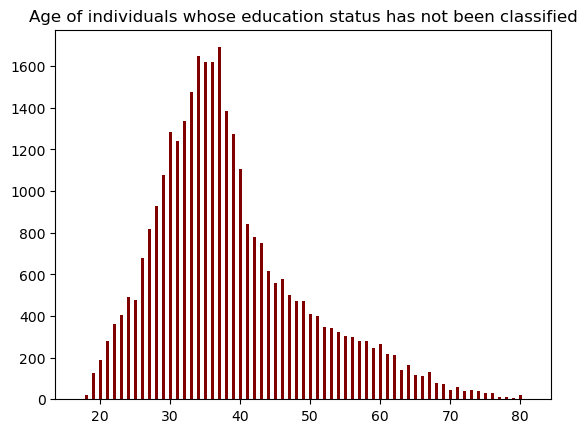

In [9]:
counter_list = Counter(my_csv[my_csv['HighestEducationLevel_High_School_Diploma'] == 0]['age'])
age = list(counter_list.keys())
values = list(counter_list.values())
plt.bar(age, values, color ='maroon', 
        width = 0.4)
plt.title('Age of individuals whose education status has not been classified')
plt.show()
# => that missing values are not related to old ages

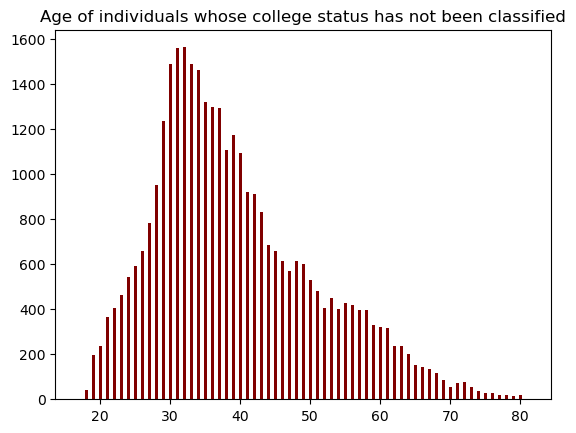

In [10]:
counter_list = Counter(my_csv[my_csv['HighestEducationLevel_Some_College'] == 0]['age'])
age = list(counter_list.keys())
values = list(counter_list.values())
plt.bar(age, values, color ='maroon', 
        width = 0.4) 
plt.title('Age of individuals whose college status has not been classified')
plt.show()
# => that missing values are not related to old ages

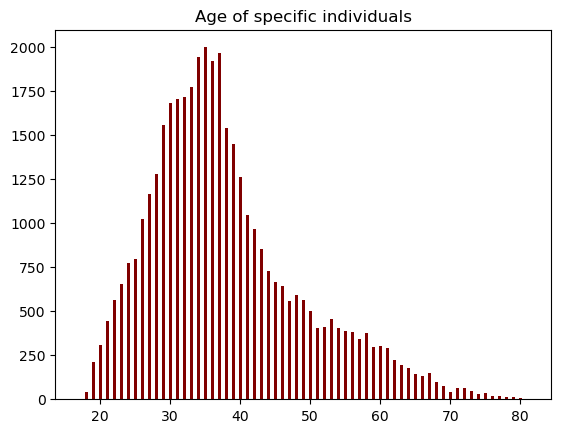

In [11]:
counter_list = Counter(my_csv[my_csv['HighestEducationLevel_No_HS_Diploma'] == 0]['age'])
age = list(counter_list.keys())
values = list(counter_list.values())
plt.bar(age, values, color ='maroon', 
        width = 0.4)
plt.title('Age of specific individuals')
plt.show()
# => that missing values are not related to old ages

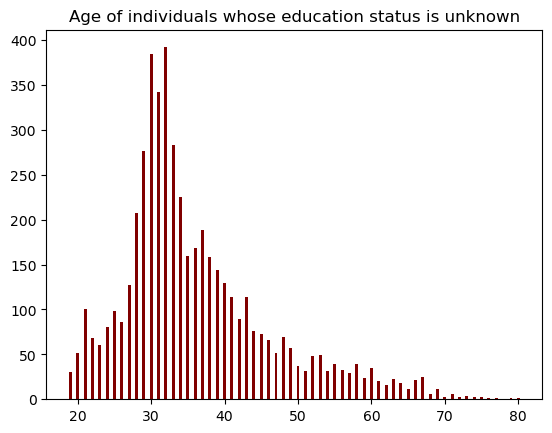

In [14]:
counter_list = Counter(my_csv[(my_csv['HighestEducationLevel_No_HS_Diploma'] == 0) & (my_csv['HighestEducationLevel_Some_College'] == 0) & (my_csv['HighestEducationLevel_High_School_Diploma'] == 0) ]['age'])
age = list(counter_list.keys())
values = list(counter_list.values())
plt.bar(age, values, color ='maroon', 
        width = 0.4)
plt.title('Age of individuals whose education status is unknown')
plt.show()
# => that missing values are not related to old ages

## AGE

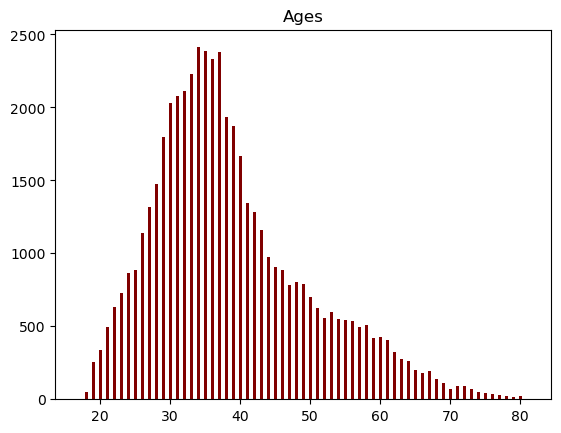

In [8]:

counter_list = Counter(my_csv['age'])

age = list(counter_list.keys())
values = list(counter_list.values())
plt.bar(age, values, color ='maroon', 
        width = 0.4)
plt.title('Ages')
plt.show()
# skewed right, mean 38.660394, median 36,  std 11.134164

## Shap values

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [76]:
y = new_csv['Recidivism']
X = new_csv.drop(['Recidivism'], axis=1)

In [77]:
new_csv.columns

Index(['age', 'num_previous_recidivisms', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'gender_Male', 'registeredSexOffender_TRUE',
       'violentOffender_TRUE', 'gangMember_x_TRUE', 'homeless_TRUE',
       'HighestEducationLevel_High_School_Diploma',
       'HighestEducationLevel_No_HS_Diploma',
       'HighestEducationLevel_Some_College', 'licenseStatus_Not_Suspended',
       'licenseStatus_Suspended', 'Recidivism', 'Employed'],
      dtype='object')

In [78]:
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, random_state = 50)

In [80]:
#rf = RandomForestClassifier(max_depth=10, min_samples_split=30, n_estimators=1500, bootstrap=False, criterion = 'gini',
#                            min_samples_leaf=6, max_features='sqrt', random_state = 50)
rf_af = RandomForestClassifier(max_depth= 7, max_features = 'sqrt', min_samples_leaf = 5, 
 min_samples_split = 5, n_estimators = 100, random_state= 50)
rf_af.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=5,
                       random_state=50)

In [23]:
import shap

In [81]:
explainer1 = shap.TreeExplainer(rf_af)
shap_values1 = explainer1(X_train)  

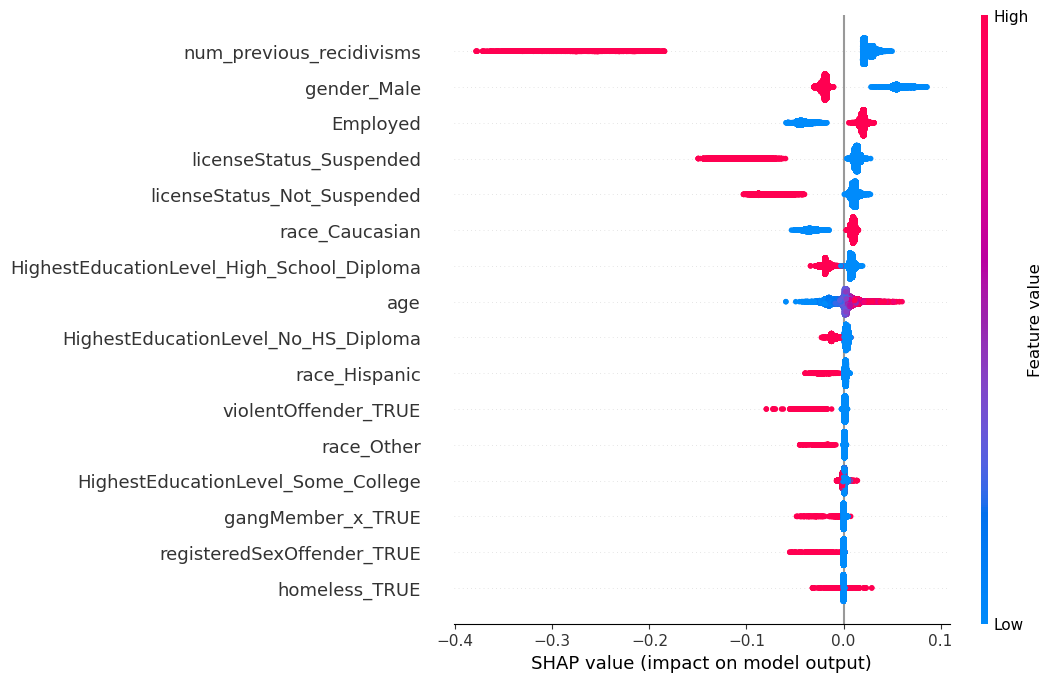

In [82]:
shap.plots.beeswarm(shap_values1[:,:,0], max_display = 23)